<a href="https://colab.research.google.com/github/afletcher53/Darknet3/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import pandas as pd
!pip install -U -q PyDrive
!pip install afinn
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from afinn import Afinn
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 
nltk.download('stopwords')
import unicodedata
import string
import re
from scipy.stats import ttest_ind, ttest_rel
import math
from nltk.corpus import stopwords
stops = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
from itertools import chain
from textblob import TextBlob


# Constants
# POS (Parts Of Speech) for: nouns, adjectives, verbs and adverbs
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

# User defined variables
n = 20 #total number of random samples you want displayed
upperpercentile = 0.25 # Upper Percentile Analysis
lowerpercentile = 0.25 # Lower Percentile Analysis
middlepercentile = 0.25 # middle percentile analysis
alpha = 0.05 #set the level of the alpha for p-value hypothesis testing

afn = Afinn(emoticons=True)

# Authenticate and create the PyDrive client. This download a drive from google drive to the local browser environment. 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Link to google drive, get the shareable link id form the "share" section - will be unique to each person using it. 
#link = 'https://drive.google.com/open?id=1g6e4aRAAr8lwTM9cL_m7shZPsTcxejNZ' # Luke Google Drive Link
link = 'https://drive.google.com/open?id=17R_Trl1dgRsWp4YAfXExuuqgF72sospb' # Julio Google Drive Link 
#link = 'https://drive.google.com/open?id=1gWIwIAKMiqJ2u9H1rBnTu2pa0RFcqahG' # Aaron's Google Drive Link
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data=pd.read_csv('Filename.csv',  encoding = "ISO-8859-1")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# A formating function which outputs descriptive information about a dataframe. 
def get_descriptive_stats(df, description):
  print('-'*120)
  print(description)
  print('-'*120)
  print("Data Values: {}" .format(df['count'].count()))
  print("The average word count (Uncleaned): {}" .format(df["count"].mean()))
  print("The average word count (Cleaned): {}" .format(df["count_clean"].mean()))
  print("The average afinn score (Uncleaned): {}" .format(df["afinn"].mean()))
  print("The average afinn score (Cleaned): {}" .format(df["afinn_clean"].mean()))
  print("The earliest review was recieved on : {}" .format(min(data['Date'])))
  print("The most recent review was recieved on {}:" .format(max(data['Date'])))
  print('-'*120)  

In [ ]:
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))


def get_ngrams(df, description):
  print('-'*120)
  print(description)
  print('-'*120)
  result = Counter(" ".join(df['comment'].values.tolist()).split(" ")).items()
  dict_unigrams = sorted(result, key=lambda x: x[1], reverse=True)

  result_clean = Counter(df['comment_clean'].sum()).items()
  dict_unigrams_clean = sorted(result_clean, key=lambda x: x[1], reverse=True)
  print("Most frequent unigrams (Uncleaned): " + ' '.join(map(str, dict_unigrams)) )
  print("Most frequent unigrams (Cleaned): " + ' '.join(map(str, dict_unigrams_clean)) )
  print('-'*120)
  
 
  df1 = pd.DataFrame.from_records(cleanData)
  df1['bigrams'] = df1['comment'].map(lambda x: find_ngrams(x.split(" "), 2))
  df1['bigrams_clean'] = df1['comment_clean_string'].map(lambda x: find_ngrams(x.split(" "), 2))

  bigrams = df1['bigrams'].tolist()
  bigrams = list(chain(*bigrams))
  bigrams = [(x.lower(), y.lower()) for x,y in bigrams]
  bigram_counts = Counter(bigrams)

  bigrams_clean = df1['bigrams_clean'].tolist()
  bigrams_clean = list(chain(*bigrams_clean))
  bigrams_clean = [(x.lower(), y.lower()) for x,y in bigrams_clean]
  bigram_counts_clean = Counter(bigrams_clean)
  print("Most frequent bigrams (Uncleaned): " + ' '.join(map(str, bigram_counts.most_common(10) )))  
  print("Most frequent bigrams (Cleaned): " + ' '.join(map(str, bigram_counts_clean.most_common(10))))  
  
  del df1
  print('-'*120)

In [ ]:
#fix some encoding errors with the dataframe. 
data.rename(columns={ data.columns[0]: "Date" }, inplace = True)
data = data.drop(['reviewer'], axis=1, errors='ignore')

In [ ]:
data

Apply AFINN to whole dataframe

In [ ]:
d = []
for p in data['comment']:
    d.append(
        {
            'Comment': p,
            'AFINN Score': afn.score(p)
        }
    )

afinn = pd.DataFrame(d)
data['afinn']= afinn['AFINN Score'].values
data.sample(n)

# Add a word count metric column 
data['count'] = data['comment'].str.count(' ') + 1

In [ ]:
data

,Date,helpful,comment,afinn,count
0,27/03/2020,4967.0,This is a fun app but there are some curse wor...,17.0,88
1,12/04/2020,1754.0,This app is amazing! I honestly think you shou...,1.0,77
2,12/04/2020,515.0,"Hi, since i got TikTok a few days ago, It was ...",0.0,78
3,30/03/2020,1825.0,If you follow many people it says you're follo...,7.0,97
4,23/04/2020,520.0,"Hi Tiktok team, I had a TikTok account with th...",-1.0,92
...,...,...,...,...,...
1389,18/04/2020,NaN,I really like this app and I enjoyed a lot by ...,2.0,33
1390,05/04/2020,3.0,I really like it but whenever I try to make a ...,5.0,38
1391,06/04/2020,NaN,Amazing app but my only complaint is that when...,8.0,35
1392,07/04/2020,8.0,"I mean- ......""DoNt bE ShY pUt SoMe mOrE"";). (...",3.0,89


## **Dataset Cleaning**

In [ ]:
# Use English stemmer.
stemmer = SnowballStemmer("english")

def remove_stops(row):
    my_list = row['comment_stemmed']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag.startswith("JJ")]

def get_nouns(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag.startswith("N")]


def clean_dataframe(dataframe):
  # create a seperate dataframe to  - when modifying the data it is important that you are not lossy - we should create a new dataframe with the agreed upon way of handing NaNs. Options - either replace NaN with data['helpful].mean() OR delete datapoints with NaN. 
  cleanData = data.copy()


  #replace the NaN with an average mean of NAN - you can run a lot of the math functions from pandas itself, no need to import math here. 
  cleanData['helpful'].fillna((cleanData['helpful'].mean()), inplace=True)

 
  # 2) Tokenize the string .
  # 3) Stem the words
  # 4) Remove stop words
  # 5) Remove punctuation
  # 6) Reconstitute string

  cleanData['comment_punctuation'] = cleanData['comment'].str.replace(r'[^\w\s]+', ' ')  # 1) Remove Punctuation
  cleanData['comment_punctuation'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
  cleanData['comment_lower'] =   cleanData['comment_punctuation'].str.lower() #2) Convert Pandas to lowercase - doesnt work
  cleanData['comment_tokenizied']=cleanData['comment_lower'].apply(lambda x : filter(None,x.split(" ")))
  cleanData['comment_stemmed']= cleanData['comment_tokenizied'].apply(lambda x : [stemmer.stem(y) for y in x])
  cleanData['comment_clean'] = cleanData.apply(remove_stops, axis=1)      
  cleanData['comment_clean_string'] = [' '.join(map(str, l)) for l in cleanData['comment_clean']] 
  cleanData['helpful'].fillna((cleanData['helpful'].mean()), inplace=True) 
  cleanData['adjectives'] = cleanData['comment'].apply(get_adjectives)
  cleanData['nouns'] = cleanData['comment'].apply(get_nouns)
  cleanData['adjectives_clean'] = cleanData['comment_clean_string'].apply(get_adjectives)
  cleanData['nouns_clean'] = cleanData['comment_clean_string'].apply(get_nouns)
  return cleanData

In [36]:
cleanData = clean_dataframe(data)

#apply afinn scoring to the "clean data"
d = []
for p in cleanData['comment_clean_string']:
    d.append(
        {
            'Comment': p,
            'Clean AFINN Score': afn.score(p)
        }
    )

afinn = pd.DataFrame(d)
cleanData['afinn_clean']= afinn['Clean AFINN Score'].values

# Add a word count metric column 
cleanData['count_clean'] = cleanData['comment_clean_string'].str.count(' ') + 1

cleanData

,Date,helpful,comment,afinn,count,comment_punctuation,comment_lower,comment_tokenizied,comment_stemmed,comment_clean,comment_clean_string,adjectives,nouns,adjectives_clean,nouns_clean,afinn_clean,count_clean
0,27/03/2020,4967.000000,This is a fun app but there are some curse wor...,17.0,88,This is a fun app but there are some curse wor...,this is a fun app but there are some curse wor...,<filter object at 0x7f03674c9150>,"[this, is, a, fun, app, but, there, are, some,...","[fun, app, curs, word, video, put, birthday, 2...",fun app curs word video put birthday 2008 give...,"[fun, curse, friendly, private, super, least, ...","[app, words, videos, birthday, videos, account...","[birthday, give, super, dont, anyth, high, app...","[fun, app, curs, word, video, kid, friend, vid...",17.0,40
1,12/04/2020,1754.000000,This app is amazing! I honestly think you shou...,1.0,77,This app is amazing I honestly think you shou...,this app is amazing i honestly think you shou...,<filter object at 0x7f03668a41d0>,"[this, app, is, amaz, i, honest, think, you, s...","[app, amaz, honest, think, filter, sad, littl,...",app amaz honest think filter sad littl childre...,"[amazing, sad, little, innocent, app]","[app, filter, children, game, ton, audios, vid...","[honest, filter, sad, audio]","[app, amaz, littl, children, game, ton, video,...",-1.0,32
2,12/04/2020,515.000000,"Hi, since i got TikTok a few days ago, It was ...",0.0,78,Hi since i got TikTok a few days ago It was ...,hi since i got tiktok a few days ago it was ...,<filter object at 0x7f036707e1d0>,"[hi, sinc, i, got, tiktok, a, few, day, ago, i...","[hi, sinc, got, tiktok, day, ago, pretti, norm...",hi sinc got tiktok day ago pretti normal saw v...,"[few, normal, same, full, same, whole]","[Hi, i, TikTok, days, i, video, video, video, ...","[tiktok, normal, full, video, whole, whi]","[hi, sinc, day, pretti, video, onc, lag, show,...",0.0,31
3,30/03/2020,1825.000000,If you follow many people it says you're follo...,7.0,97,If you follow many people it says you re follo...,if you follow many people it says you re follo...,<filter object at 0x7f036704a9d0>,"[if, you, follow, mani, peopl, it, say, you, r...","[follow, mani, peopl, say, follow, fast, let, ...",follow mani peopl say follow fast let follow 1...,"[many, Same, total, internal, false]","[people, day, thing, videos, comments, likes, ...","[follow, like, total, intern, hear, sound, las...","[mani, peopl, day, thing, video, comment, gig,...",9.0,54
4,23/04/2020,520.000000,"Hi Tiktok team, I had a TikTok account with th...",-1.0,92,Hi Tiktok team I had a TikTok account with th...,hi tiktok team i had a tiktok account with th...,<filter object at 0x7f036706cf90>,"[hi, tiktok, team, i, had, a, tiktok, account,...","[hi, tiktok, team, tiktok, account, id, userna...",hi tiktok team tiktok account id usernameremov...,"[past, low, like]","[Hi, Tiktok, team, TikTok, account, id, @, USE...","[id, usernameremov, give, proper, alreadi, low...","[hi, tiktok, team, tiktok, account, rate, beca...",0.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,18/04/2020,108.221865,I really like this app and I enjoyed a lot by ...,2.0,33,I really like this app and I enjoyed a lot by ...,i really like this app and i enjoyed a lot by ...,<filter object at 0x7f0366bc11d0>,"[i, realli, like, this, app, and, i, enjoy, a,...","[realli, like, app, enjoy, lot, make, tiktok, ...",realli like app enjoy lot make tiktok video is...,"[tiktok, live]","[app, lot, videos, issues, Issue, number, opti...",[live],"[realli, app, enjoy, lot, tiktok, video, issu,...",2.0,20
1390,05/04/2020,3.000000,I really like it but whenever I try to make a ...,5.0,38,I really like it but whenever I try to make a ...,i really like it but whenever i try to make a ...,<filter object at 0x7f0366bc1b10>,"[i, realli, like, it, but, whenev, i, tri, to,...","[realli, like, whenev, tri, make, vid, screen,...",realli like whenev tri make vid screen turn bl...,[black],"[vid, sc

## **Descriptive Statistics - All AFINN scores**

In [ ]:
get_descriptive_stats(cleanData, "Information on whole data")
get_ngrams(cleanData, "ngram information")

------------------------------------------------------------------------------------------------------------------------
Information on whole data
------------------------------------------------------------------------------------------------------------------------
Data Values: 1394
The average word count (Uncleaned): 54.244619799139166
The average word count (Cleaned): 27.06958393113343
The average afinn score (Uncleaned): 6.426111908177905
The average afinn score (Cleaned): 5.142754662840746
The earliest review was recieved on : 01/04/2020
The most recent review was recieved on 31/03/2020:
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
ngram information
------------------------------------------------------------------------------------------------------------------------
Most frequent unig

In [ ]:
cleanData['comment_clean_string']

0       fun app curs word video put birthday 2008 give...
1       app amaz honest think filter sad littl childre...
2       hi sinc got tiktok day ago pretti normal saw v...
3       follow mani peopl say follow fast let follow 1...
4       hi tiktok team tiktok account id usernameremov...
                              ...                        
1389    realli like app enjoy lot make tiktok video is...
1390    realli like whenev tri make vid screen turn bl...
1391    amaz app onli complaint ever open app add besi...
1392    mean dont shi put ive app least 2 year ive pro...
1393    use tiktok everyday sad happi bore tiktok grea...
Name: comment_clean_string, Length: 1394, dtype: object

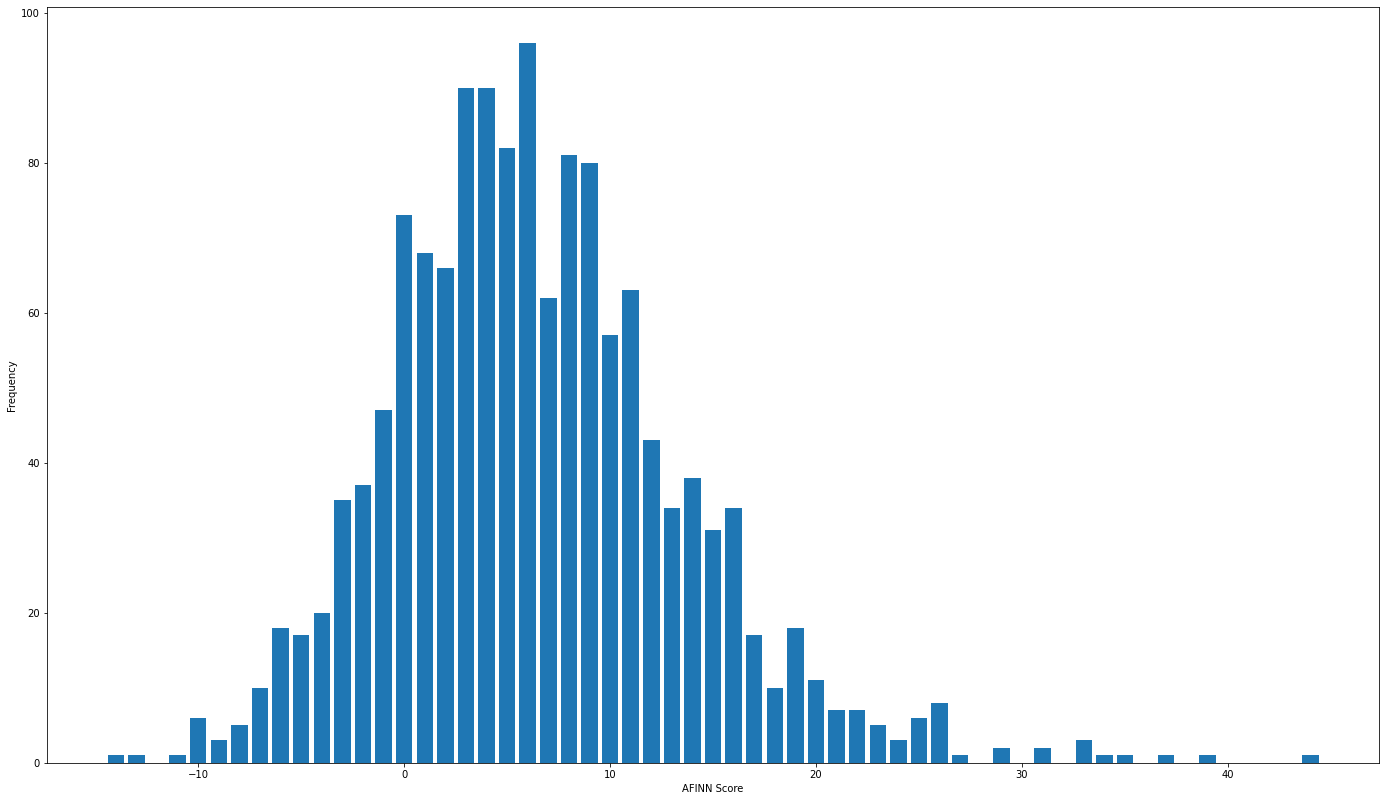

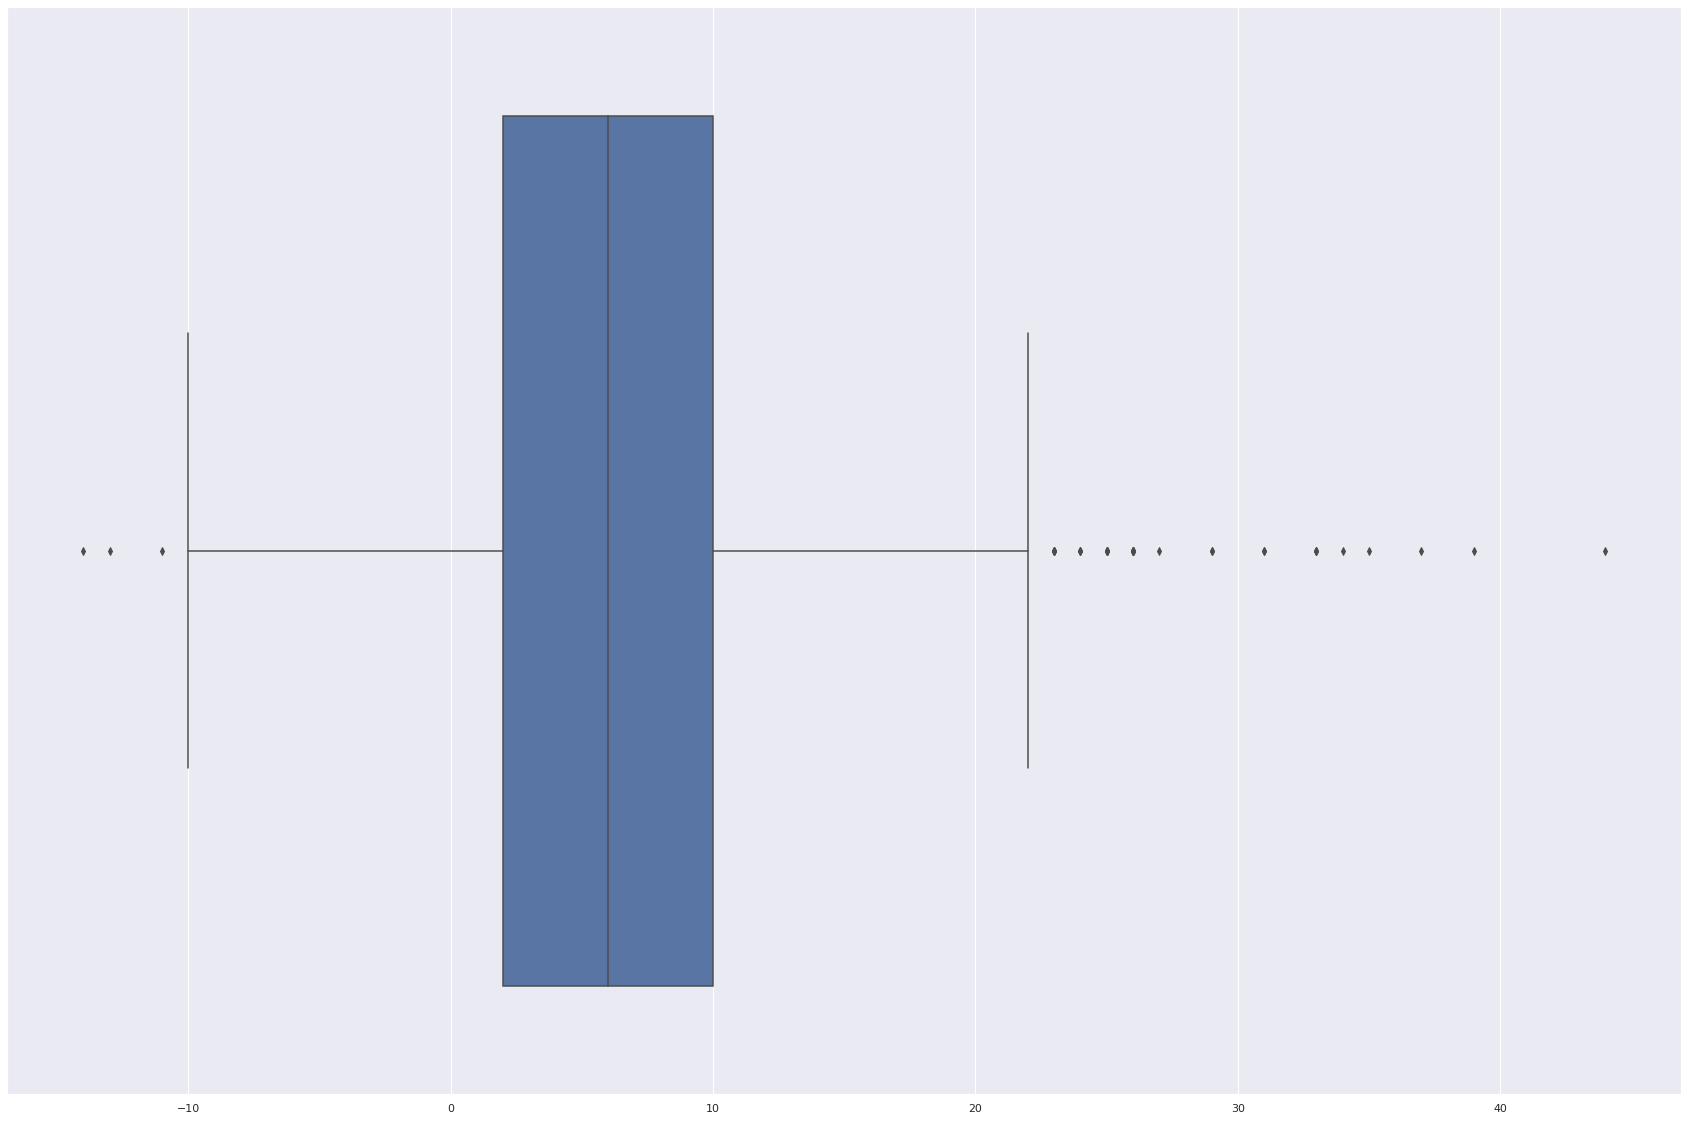

In [ ]:
# Plots for data distribution
data_2 = cleanData
counts = data_2['afinn'].value_counts().to_dict()
import collections
od = collections.OrderedDict(sorted(counts.items()))
keys = od.keys()
values = od.values()


#Testing for data distribution
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(keys,values)
plt.xlabel("AFINN Score")
plt.ylabel("Frequency")
plt.show()


import seaborn as sns
import numpy as np
measurements = np.random.normal(loc = 20, scale = 5, size = 140)
sns.set(rc={'figure.figsize':(30,20)})
ax = sns.boxplot(x=data_2['afinn'].to_numpy())

In [ ]:
# ALL Scores
get_descriptive_stats(cleanData, "All AFINN Descriptive Statistics")

------------------------------------------------------------------------------------------------------------------------
All AFINN Descriptive Statistics
------------------------------------------------------------------------------------------------------------------------
Data Values: 1394
The average word count (Uncleaned): 54.244619799139166
The average word count (Cleaned): 27.06958393113343
The average afinn score (Uncleaned): 6.426111908177905
The average afinn score (Cleaned): 5.142754662840746
The earliest review was recieved on : 01/04/2020
The most recent review was recieved on 31/03/2020:
------------------------------------------------------------------------------------------------------------------------


In [ ]:
# # Remove accents function
# def remove_accents(data):
#     return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

# def clean_dataset(df):
   
#   li = df['comment'].tolist()
#   print()
#   print("Total Comments Processed:", len(li))

#   # Get stopwords, stemmer and lemmatizer
#   stopwords = nltk.corpus.stopwords.words('english')
#   stemmer = nltk.stem.PorterStemmer()
#   lemmatizer = nltk.stem.WordNetLemmatizer()

#   # Process all quotes
#   li_tokens = []
#   li_token_lists = []
#   li_lem_strings = []

#   for i,text in enumerate(li):
#     # Tokenize by sentence, then by lowercase word
#     tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

#     # Process all tokens per quote
#     li_tokens_quote = []
#     li_tokens_quote_lem = []
#     for token in tokens:
#         # Remove accents
#         t = remove_accents(token)

#         # Remove punctuation
#         t = str(t).translate(string.punctuation)
#         li_tokens_quote.append(t)
        
#         # Add token that represents "no lemmatization match"
#         li_tokens_quote_lem.append("-") # this token will be removed if a lemmatization match is found below

#         # Process each token
#         if t not in stopwords:
#             if re.search(RE_VALID, t):
#                 if len(t) >= MIN_STR_LEN:
#                     # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
#                     # (otherwise it assumes the word is a noun)
#                     pos = nltk.pos_tag([t])[0][1][:2]
#                     pos2 = 'n'  # set default to noun
#                     if pos in DI_POS_TYPES:
#                       pos2 = DI_POS_TYPES[pos]
                    
#                     stem = stemmer.stem(t)
#                     lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS
                    
#                     if pos in POS_TYPES:
#                         li_tokens.append((t, stem, lem, pos))

#                         # Remove the "-" token and append the lemmatization match
#                         li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
#                         li_tokens_quote_lem.append(lem)

#   # Build list of token lists from lemmatized tokens
#   li_token_lists.append(li_tokens_quote)
    
#   # Build list of strings from lemmatized tokens
#   str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
#   li_lem_strings.append(str_li_tokens_quote_lem)

#   # Build resulting dataframes from lists
#   df_token_lists = pd.DataFrame(li_token_lists)

#   # Replace None with empty string
#   for c in df_token_lists:
#      if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
#         df_token_lists[c].fillna(value='', inplace=True)

#   df_lem_strings = pd.DataFrame(li_lem_strings, columns=['comment'])

#   # Add counts
#   print("Group by lemmatized words, add count and sort:")
#   df_all_words = pd.DataFrame(li_tokens, columns=['token', 'stem', 'lem', 'pos'])
#   df_all_words['counts'] = df_all_words.groupby(['lem'])['lem'].transform('count')
#   df_all_words = df_all_words.sort_values(by=['counts', 'lem'], ascending=[False, True]).reset_index()

#   print("Get just the first row in each lemmatized group")
#   df_words = df_all_words.groupby('lem').first().sort_values(by='counts', ascending=False).reset_index()
#   print("df_words.head(10):")
#   print(df_words.head(10))

#   df_words = df_words[['lem', 'pos', 'counts']].head(200)
#   for v in POS_TYPES:
#       df_pos = df_words[df_words['pos'] == v]
#       print()
#       print("POS_TYPE:", v)
#       print(df_pos.head(10).to_string())

#   li_token_lists_flat = [y for x in li_token_lists for y in x]  # flatten the list of token lists to a single list
#   print("li_token_lists_flat[:10]:", li_token_lists_flat[:10])

#   di_freq = nltk.FreqDist(li_token_lists_flat)
#   del di_freq['']
#   li_freq_sorted = sorted(di_freq.items(), key=lambda x: x[1], reverse=True)  # sorted list
#   print(li_freq_sorted)
    
#   di_freq.plot(30, cumulative=False)

#   li_lem_words = df_all_words['lem'].tolist()
#   di_freq2 = nltk.FreqDist(li_lem_words)
#   li_freq_sorted2 = sorted(di_freq2.items(), key=lambda x: x[1], reverse=True)  # sorted list
#   print(li_freq_sorted2)
    
#   di_freq2.plot(30, cumulative=False)

#   return li

In [ ]:
# # Convert quotes to list
# clean_dataset(cleanData)
# clean_dataset(p_75)

In [ ]:
# # dataframes containing all helpful score and afinn score
# # run t test in python in panda (Compare helpful score to afinn score)


# afn_scores = []
# helpful_scores = []

# for comment in data['comment']:
#   afn_scores.append(afn.score(comment))

# dataset_afinn = pd.DataFrame(afn_scores, columns= ['Afinn score'])

# for helpful in data['helpful']:
#   if math.isnan(helpful):
#     helpful = data['helpful'].mean()
#   helpful_scores.append(helpful)

# dataset_helpful = pd.DataFrame(helpful_scores, columns= ['Helpful score'])

# # dataset_helpful.info()
# # dataset_afinn.info()
# #print(data['helpful'])

# #Dependent t test
# ttest_rel(dataset_helpful['Helpful score'], dataset_afinn['Afinn score'])

# **Hypothesis Testing**

## 1. A greater helpful comment rating will result in a greater AFINN score 
Null hypothesis: A greater helpful comment rating will not result in a greater AFINN score 

In [ ]:
# function to print the results of statistical testing in a pretty format. 
def print_stat_results(result, description, x_name, y_name): 
  print('-'*150)
  print(f"Independant {description} result - {x_name} vs {y_name}")
  print('-'*150)
  print("T Statistic:" + '%.10f' % result[0])
  print('p Value:' + '%.3E' % result[1])
  print('-'*150)
  if (result[1] < alpha):
    string = f"***SUCCESS***: p value is lower than the alpha({alpha}). {x_name} correlates with {y_name}, reject the null hypothesis."
  else:
      string = f"***FAIL***: p value is higher than the alpha({alpha}). {x_name} doesn't correlates with {y_name}, accept the null hypothesis."
  print(string)
  print('-'*150)

In [ ]:
# # Split up the dataframe into different halfs -> lower half(0-50%), upper half (50%->100%)

# n = 25


# sortedAfinn = cleanData.sort_values(by=['afinn'], ascending=False)
# topHalfAfinn = sortedAfinn.head(int(len(sortedAfinn)*(n/100)))
# bottomHalfAfinn = sortedAfinn.tail(int(len(sortedAfinn)*(n/100)))
# #run the t test
# result_helpful_afinn = ttest_rel(topHalfAfinn['helpful'], bottomHalfAfinn['helpful'],)
# result_helpful_afinn_clean = ttest_rel(topHalfAfinn['helpful'], bottomHalfAfinn['helpful'],)
# print_stat_results(result_helpful_afinn, "t-test", "Helpful Rating", "AFINN Score")
# print_stat_results(result_helpful_afinn_clean, "t-test", "Helpful Rating", "AFINN Score Clean")

------------------------------------------------------------------------------------------------------------------------------------------------------
Independant t-test result - Helpful Rating vs AFINN Score
------------------------------------------------------------------------------------------------------------------------------------------------------
T Statistic:1.7853277321
p Value:7.508E-02
------------------------------------------------------------------------------------------------------------------------------------------------------
***FAIL***: p value is higher than the alpha(0.05). Helpful Rating doesn't correlates with AFINN Score, accept the null hypothesis.
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Independant 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


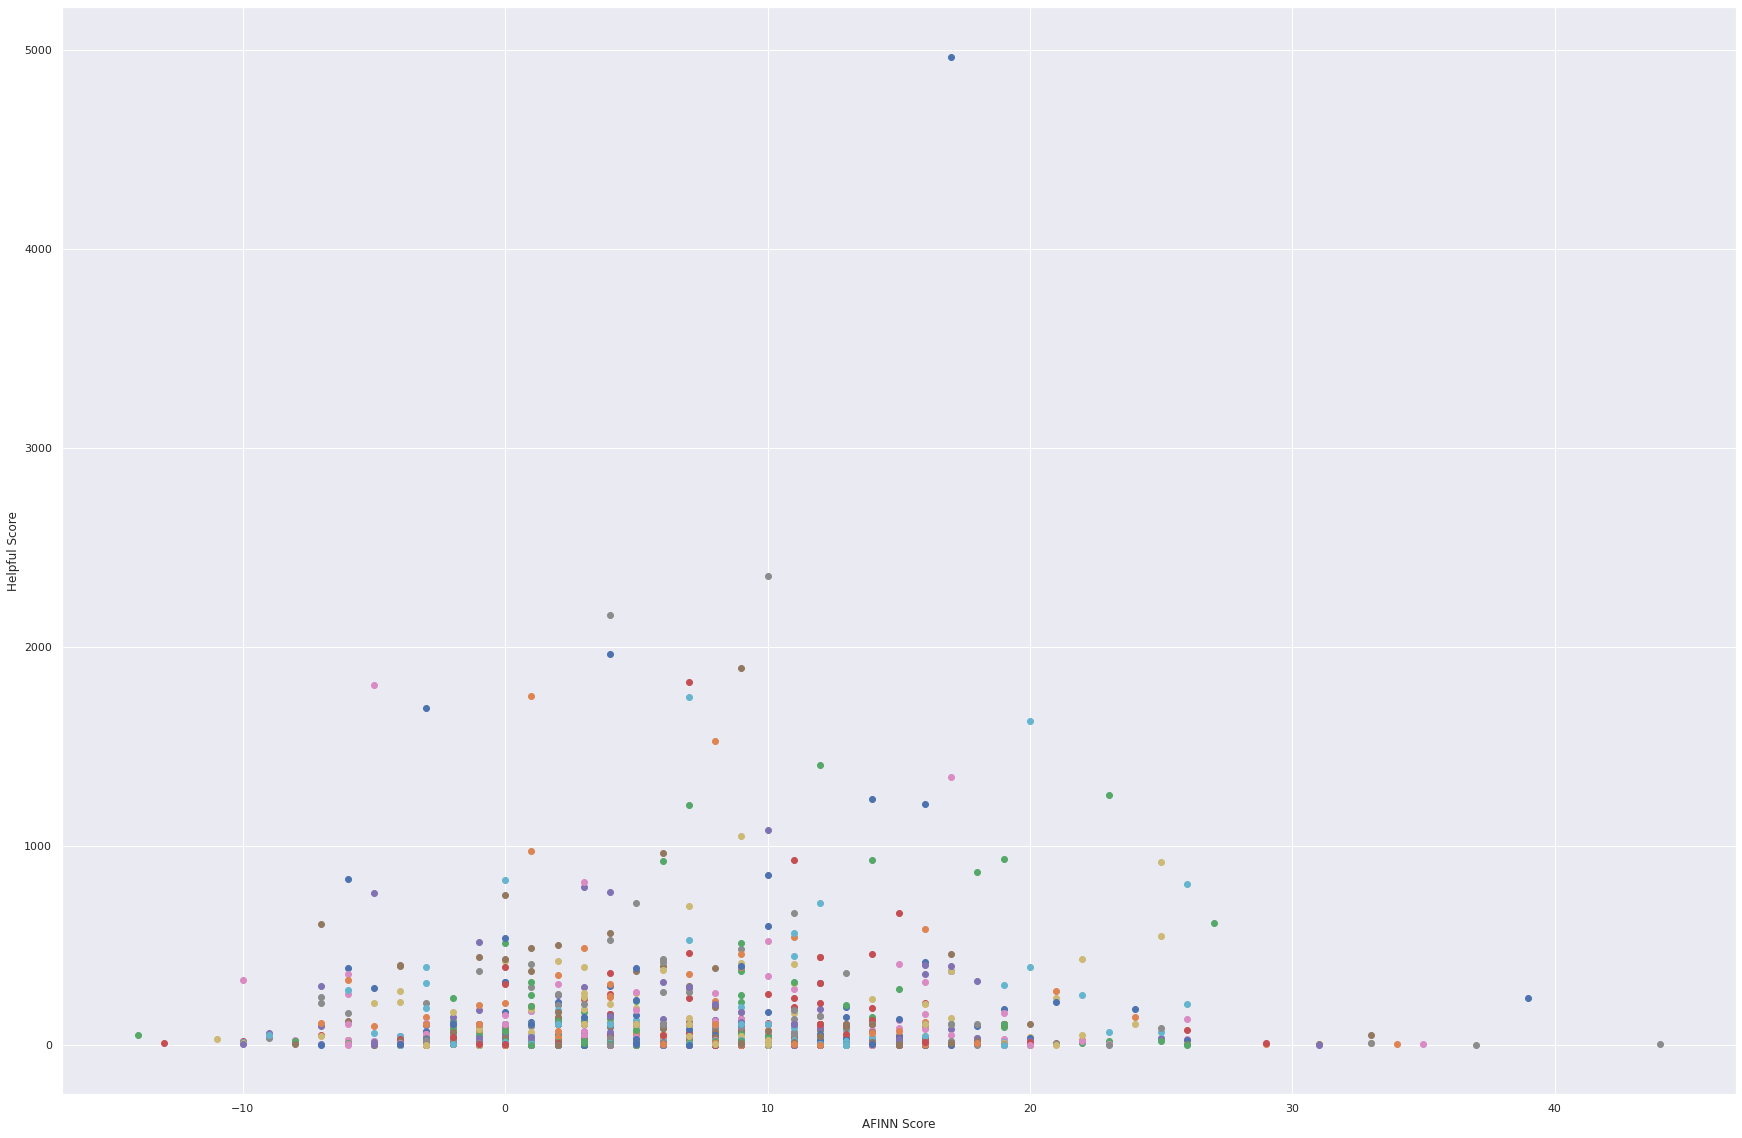

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


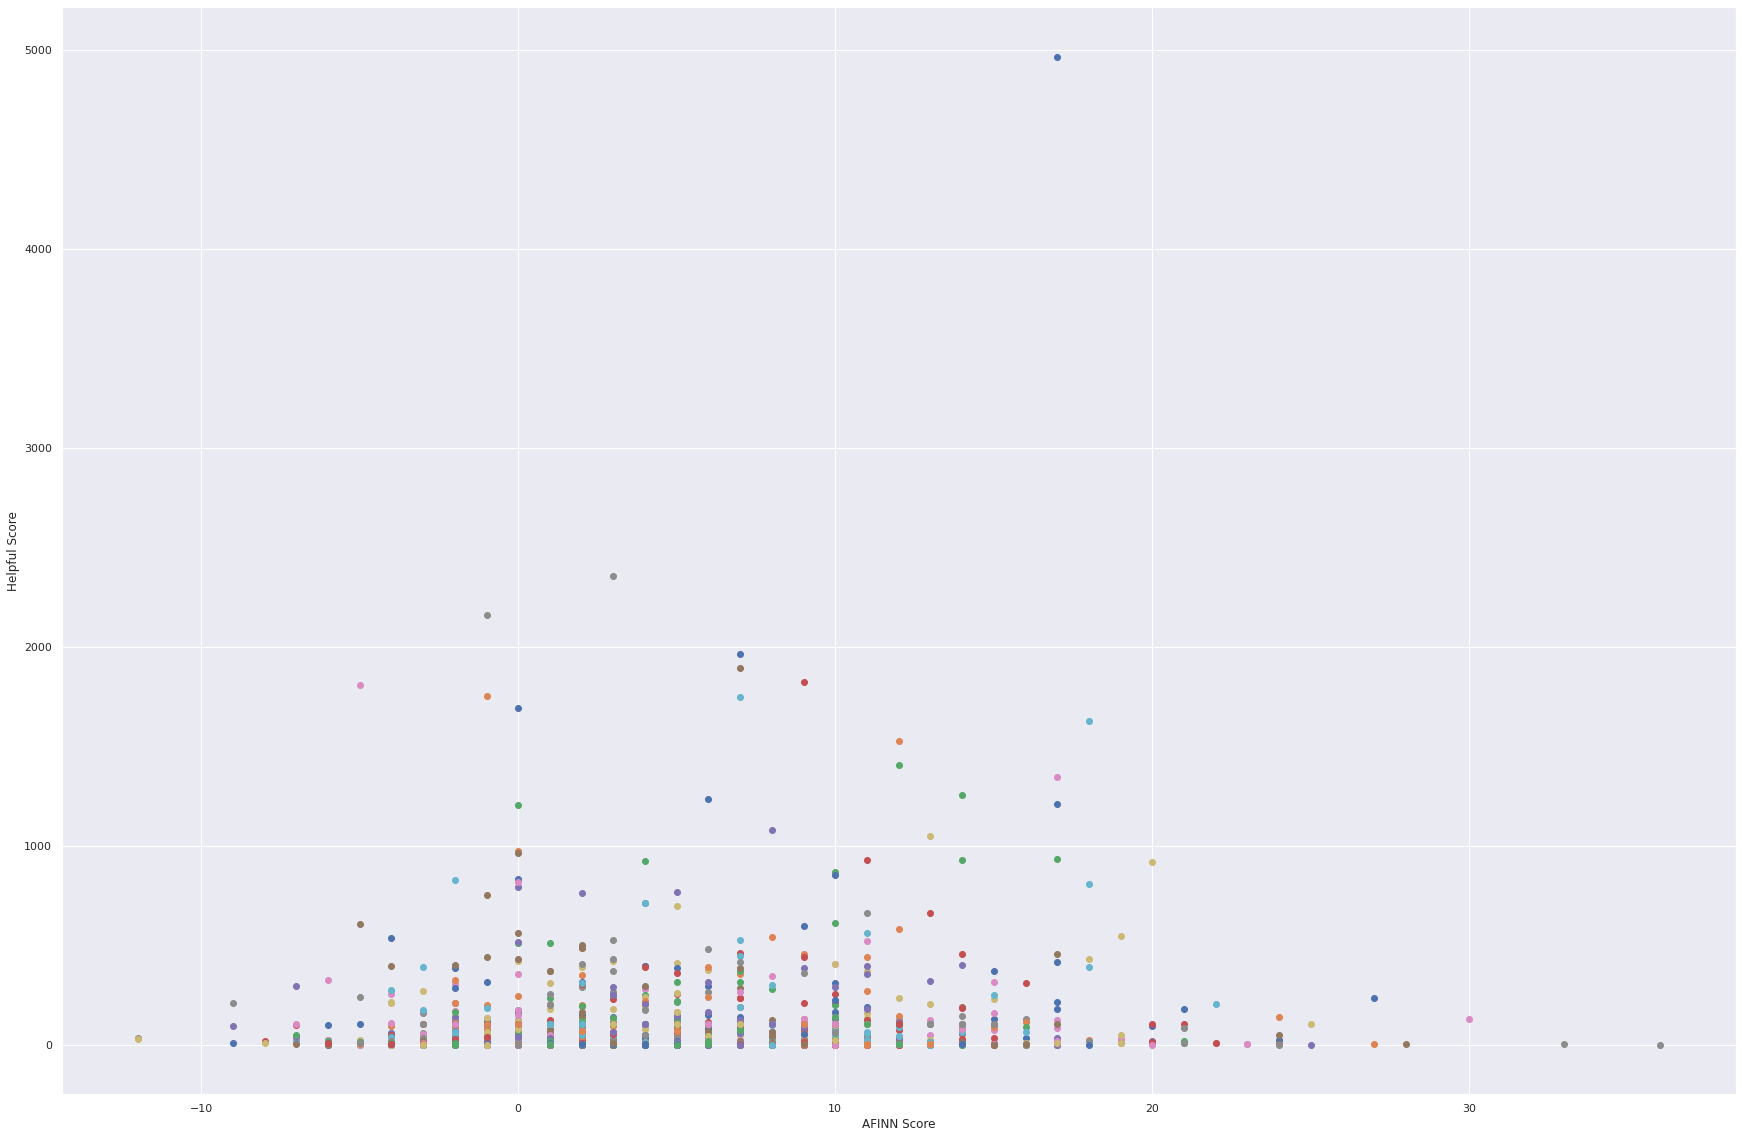

In [38]:
x,y = [],[]
y.append(cleanData['afinn'])
x.append(cleanData['helpful'])

fig = plt.figure()
plt.xlabel("AFINN Score")
plt.ylabel("Helpful Score")
ax = fig.add_subplot(111)
ax.plot(y,x,'o-')
plt.show()

x,y = [],[]
y.append(cleanData['afinn_clean'])
x.append(cleanData['helpful'])

fig = plt.figure()
plt.xlabel("AFINN Score")
plt.ylabel("Helpful Score")
ax = fig.add_subplot(111)
ax.plot(y,x,'o-')
plt.show()



## 2. A greater comment length results in a greater AFINN Score
Null hypothesis: a greater comment length does not result in a greater AFINN score

In [ ]:
# Split up the dataframe into different halfs -> lower half(0-50%), upper half (50%->100%)

n = 25
sortedAfinn = cleanData.sort_values(by=['afinn'], ascending=False)
topHalfAfinn = sortedAfinn.head(int(len(sortedAfinn)*(n/100)))
bottomHalfAfinn = sortedAfinn.tail(int(len(sortedAfinn)*(n/100)))

result_helpful_afinn = ttest_rel(topHalfAfinn['count'], bottomHalfAfinn['count'])
result_helpful_afinn_clean = ttest_rel(topHalfAfinn['count_clean'], bottomHalfAfinn['count_clean'])
print_stat_results(result_helpful_afinn, "t-test", "Lower 50% Count", "Upper 50% Count")
print_stat_results(result_helpful_afinn_clean, "t-test", "Lower 50% Count Clean", "Upper 50% Count Clean")

tophalfmean = topHalfAfinn['count'].mean()
bottomhalfmean = bottomHalfAfinn['count'].mean()
print(f"The top half's mean comment length (clean) was: {tophalfmean}")
print(f"The bottom half's mean comment length (clean) was: {bottomhalfmean}")

## 3. Most frequent ngrams used by top and bottom comments

In [ ]:
from wordcloud import WordCloud
#pass a variable to give positive / negative colour tinting. 
#find unique words from both lists -> Then display those lists. 

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
  h = random_state.randint(0, 360)  #int(360.0 * 21.0 / 255.0)
  s = int(100.0 * 255.0 / 255.0)
  l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
  return "hsl({}, {}%, {}%)".format(h, s, l)

def get_wordcloud(list):
  wordcloud = WordCloud(background_color='white', width=1600, height=800,  color_func=random_color_func).generate(' '.join(list),)
  plt.figure( figsize=(30,20) )
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  print("")

In [ ]:
get_ngrams(topHalfAfinn, "Top half")
get_ngrams(bottomHalfAfinn, "Bottom half")
get_wordcloud(topHalfAfinn['adjectives'].sum())
get_wordcloud(topHalfAfinn['nouns'].sum())
get_wordcloud(bottomHalfAfinn['adjectives'].sum())
get_wordcloud(bottomHalfAfinn['nouns'].sum())

print("")

get_wordcloud(topHalfAfinn['adjectives_clean'].sum())
get_wordcloud(topHalfAfinn['nouns_clean'].sum())
get_wordcloud(bottomHalfAfinn['adjectives_clean'].sum())
get_wordcloud(bottomHalfAfinn['nouns_clean'].sum())